# Labeling For All Content Types

Use this notebook the final index file and label Alignment Sheets and Figures based on their title. This is the scenario where we have already labeled the tables. This notebook will be removed during the code review and cleaning process.

# Imports

In [467]:
import pickle
import re
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import *
from nltk.util import ngrams
from pathlib import Path
pd.set_option("display.max_columns", 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_rows', None)
import warnings
warnings.filterwarnings('ignore')

# Setup

## Load our list of keywords created in keywords.py

In [468]:
with open("keywords.pkl", "rb") as f:
    keywords = pickle.load(f)        

In [469]:
print(keywords[14])

['navig navig safeti', 'navig', 'nonnavig', 'navig protect activ', 'guid line', 'guid wire', 'signag', 'waterway', 'cross', 'cross plan', 'impact navig', 'dewat navig water', 'navig water', 'navig waterway', 'navig', 'navig', 'watercours', 'watercours cross', 'water cross', 'cross methodolog', 'horizont direct drill', 'hdd', 'bridg', 'marin', 'marin termin', 'waterway user', 'recreat waterway user', 'navig use', 'tributari', 'tourism', 'tourist', 'guid outfitt', 'outfitt', 'angler', 'cano', 'kayak', 'boat', 'sail', 'sail', 'fisheri ocean canada', 'navig protect act', 'navig watercours', 'navig safeti', 'schedul water', 'non-schedul water', 'recreation-rel navig', 'commercial-rel navig', 'watercours user', 'waterway user', 'watercours cross', 'cross method', 'trenchless cross', 'trench cross', 'navig hazard', 'expos instream', 'buoyanc issu', 'upstream', 'downstream', 'warn sign', 'warn signag', 'instream', 'temporari vehicl cross', 'bed', 'bank', 'preconstruct contour', 'hydraul charac

In [470]:
# list of VCs

labels_list = ['Landscape, terrain, and weather', 
                'Soil',
                'Plants',
                'Water',
                'Fish',
                'Wetlands',
                'Wildlife',
                'Species at Risk',
                'Greenhouse gas emissions',
                'Air emissions',
                'Noise',
                'Electricity and electromagnetism',
                'Proximity to people',
                'Archaeological, paleontological, historical, and culturally significant sites and resources',
                'Human access to boats and waterways',
                'Indigenous land, water, and air use',
                'Impact to social and cultural well-being',
                'Impact to human health and viewscapes',
                'Social, cultural, economic infrastructure and services',
                'Economic Offsets and Impact',
                'Environmental Obligations',
                'Treaty and Indigenous Rights']

# Load Final Index File

This is where we load the 'final' index file so that we can label the figures and alignment sheets.

In [471]:
final_index_path = str(Path().resolve().parents[1]) + '\\Output_Files\\final_index_files\\'

print(final_index_path)

C:\Users\ThibJacq\code\esa-data-bank_banque-donnees-ees\Output_Files\final_index_files\


In [472]:
df = pd.read_csv(final_index_path + 'ESA_website_ENG.csv')
df.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
0,Table 13.2-1 Cost Comparisons of the Three Alternatives Route,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",31,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-1-cost-comparisons-of-the-three-alterna_pt-1_pg-31_doc-num-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Table 13.2-2 Linear Corridors Followed by Each Alternative,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",32,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-2-linear-corridors-followed-by-each-alt_pt-1_pg-32_doc-num-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1


In [473]:
df_tables = df[df['Content Type'].isin(['Table'])]
df_f_as = df[df['Content Type'].isin(['Figure', 'Alignment Sheet'])]

In [474]:
df_tables.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
0,Table 13.2-1 Cost Comparisons of the Three Alternatives Route,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",31,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-1-cost-comparisons-of-the-three-alterna_pt-1_pg-31_doc-num-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Table 13.2-2 Linear Corridors Followed by Each Alternative,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",32,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-2-linear-corridors-followed-by-each-alt_pt-1_pg-32_doc-num-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1


In [475]:
df_f_as.tail(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21423,"Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,499,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/4003703_499.jpg,4003703,4003703_499_a_1,21423
21424,"Figure 14.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Lundbreck Sec...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,500,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/4003703_500.jpg,4003703,4003703_500_a_1,21424


## Labeling For All Content Types

Use this notebook the final index file and label Alignment Sheets and Figures based on their title. This is the scenario where we have already labeled the tables. This notebook will be removed during the code review and cleaning process.

In [476]:
df_f_as['text'] = df_f_as['Title']

In [477]:
from bs4 import BeautifulSoup

df_f_as['text'] = df_f_as['text'].apply(lambda x: BeautifulSoup(str(x), "html.parser").get_text(separator=' ')) # remove html tags
df_f_as['text'] = df_f_as['text'].replace('[^a-zA-Z0-9 ]', ' ', regex=True) # remove all non-alpha-numeric characters
df_f_as['text'] = df_f_as['text'].replace('\w{25,}', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace('cid\d+', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace(' s ', ' ', regex=True)
df_f_as['text'] = df_f_as['text'].replace(' +', ' ', regex=True) # remove all extra spaces in text

In [478]:
df_f_as['text'] = df_f_as['text'].apply(lambda x: x[:30_000]) # making sure the text is not longer than 30k characters
df_f_as.head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,Figure 13 1 1 EnCana Ekwan Pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,Figure 13 3 1 CEA Framework
15336,Figure 13.4-1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",44,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_44.jpg,268706,268706_44_f_1,15336,Figure 13 4 1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000
15337,Figure 13.4-2 Mean Monthly Rainfall and Number of Days with Measurable Rainfall Observed at the ...,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.

In [479]:
table_texts = df_f_as['text'].tolist()

tokenized_table_texts = []
stemmer = PorterStemmer()

for i, table_text in enumerate(table_texts):
    processed_text = word_tokenize(table_text)
    processed_text = [stemmer.stem(w) for w in processed_text if w not in stopwords.words("english")]
    table_ngram_list = []
    for n in range(1, 7):
        table_ngrams = list(ngrams(processed_text, n))
        table_ngram_list.extend([" ".join(table_gram) for table_gram in table_ngrams])

    tokenized_table_texts.append(table_ngram_list)
    
print(tokenized_table_texts[0][0:200])

['figur', '13', '1', '1', 'encana', 'ekwan', 'pipelin', 'figur 13', '13 1', '1 1', '1 encana', 'encana ekwan', 'ekwan pipelin', 'figur 13 1', '13 1 1', '1 1 encana', '1 encana ekwan', 'encana ekwan pipelin', 'figur 13 1 1', '13 1 1 encana', '1 1 encana ekwan', '1 encana ekwan pipelin', 'figur 13 1 1 encana', '13 1 1 encana ekwan', '1 1 encana ekwan pipelin', 'figur 13 1 1 encana ekwan', '13 1 1 encana ekwan pipelin']


In [480]:
with open('tokenized_figure_alignment_sheet_titles.pkl', 'wb') as f:
    pickle.dump(tokenized_table_texts, f)

In [481]:
with open('tokenized_figure_alignment_sheet_titles.pkl', 'rb') as f:
    tokenized_table_text = pickle.load(f)

In [482]:
print(tokenized_table_text[0][:10], '\n', tokenized_table_text[-1][:50])

['figur', '13', '1', '1', 'encana', 'ekwan', 'pipelin', 'figur 13', '13 1', '1 1'] 
 ['figur', '14', '2', 'locat', 'nearest', 'popul', 'land', 'base', 'engag', 'indigen', 'group', 'lundbreck', 'section', 'figur 14', '14 2', '2 locat', 'locat nearest', 'nearest popul', 'popul land', 'land base', 'base engag', 'engag indigen', 'indigen group', 'group lundbreck', 'lundbreck section', 'figur 14 2', '14 2 locat', '2 locat nearest', 'locat nearest popul', 'nearest popul land', 'popul land base', 'land base engag', 'base engag indigen', 'engag indigen group', 'indigen group lundbreck', 'group lundbreck section', 'figur 14 2 locat', '14 2 locat nearest', '2 locat nearest popul', 'locat nearest popul land', 'nearest popul land base', 'popul land base engag', 'land base engag indigen', 'base engag indigen group', 'engag indigen group lundbreck', 'indigen group lundbreck section', 'figur 14 2 locat nearest', '14 2 locat nearest popul', '2 locat nearest popul land', 'locat nearest popul land base'

In [483]:
for label in labels_list:
    df_f_as[f'{label}'] = 0
    # df_f_as[f'{label} - Number of Matches'] = 0
    # df_f_as[f'{label} Relevance'] = 0

df_f_as.head(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,Figure 13 1 1 EnCana Ekwan Pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,Figure 13 3 1 CEA Framework


In [484]:
def label_with_keywords(i, table_text, keywords_for_label, label):
    number_of_matches = len([word for word in keywords_for_label if word in table_text])
    df_f_as[f'{label}'][i] = number_of_matches

In [485]:
def string_total_sum_match_2_lists(list_1, list_2):
    """
    This function takes two lists of strings and counts the number of total matches between the two lists, including duplicates.
    The function returns the number of total matches.
    """
    # Initialize the count variable.
    count = 0
    # Iterate over the first list.
    for item in list_1:
        # If the item is in the second list, increment the count variable.
        if item in list_2:
            count += 1
    # Return the count variable.
    return count

In [486]:
df_f_as.text.iloc[-1]

'Figure 14 2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups Lundbreck Section'

In [487]:
df_f_as.index[0]

15334

In [488]:
for i, table_text in zip(df_f_as.index, tokenized_table_text):
    for keywords_for_label, label in zip(keywords, labels_list):
        number_of_matches = string_total_sum_match_2_lists(table_text, keywords_for_label)
        df_f_as[f'{label}'][i] = number_of_matches
        
with open("esa_index_ENG_labeled.pkl", "wb") as f:
    pickle.dump(df_f_as, f)

df_f_as.head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
15334,Figure 13.1-1 EnCana Ekwan Pipeline,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",26,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,thumbnails/268706_26.jpg,268706,268706_26_f_1,15334,Figure 13 1 1 EnCana Ekwan Pipeline
15335,Figure 13.3-1 CEA Framework,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,thumbnails/268706_41.jpg,268706,268706_41_f_1,15335,Figure 13 3 1 CEA Framework
15336,Figure 13.4-1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",44,107.0,1.41,Yes,NaN,NaN,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,thumbnails/268706_44.jpg,268706,268706_44_f_1,15336,Figure 13 4 1 Temperature Normals Measured at the Fort Nelson Airport for the Period 1971 to 2000
15337,Figure 13.4-2 Mean Monthly Rainfall and Number of Days with Measurable Rainfall Observed at the ...,Figure,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.

In [489]:
df_f_as.iloc[-56:-54, 29:]

,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID,text
21369,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/3974108_442.jpg,3974108,3974108_442_a_1,21369,Figure 2 2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups Lundbreck Section
21370,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,thumbnails/3974307_115.jpg,3974307,3974307_115_a_1,21370,Figure E 1 Problem Soil Handling Procedure Decision Chart


# Drop text and remerge index

In [490]:
df_f_as.drop(columns=['text'], inplace=True)

In [491]:
df = df_tables.append(df_f_as)
df.tail(2)

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21423,"Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Turner Valley...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,499,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/4003703_499.jpg,4003703,4003703_499_a_1,21423
21424,"Figure 14.2 Locations of Nearest Populated Land Base of Engaged Indigenous Groups, Lundbreck Sec...",Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,500,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,2,thumbnails/4003703_500.jpg,4003703,4003703_500_a_1,21424


# Normalize match values

In [492]:
import numpy as np
max_value_list = []
df_norm = df.copy()
for content_type in ['Table', 'Figure', 'Alignment Sheet']:
    df_content_type = df[df['Content Type'] == content_type]
    for label in labels_list:
        df_log = np.log2(df_content_type[f'{label}'].replace(0, np.nan) + 1)
        max_vc = df_log.max()
        updated_vc_col = df_log / max_vc * 100
        updated_vc_col.replace(np.nan, 0, inplace=True)
        df_content_type[f'{label}'] = np.ceil(updated_vc_col).astype(int)
        max_value_list.append([content_type, label, max_vc])
    df_norm.loc[df_content_type.index] = df_content_type

In [493]:
(unique, counts) = np.unique(scaled, return_counts=True)
frequencies = np.asarray((unique, counts)).T
print(frequencies)

[[    0 16866]
 [   10  1059]
 [   16   659]
 [   19   407]
 [   22   361]
 [   25   192]
 [   27   228]
 [   28   152]
 [   29   149]
 [   31    89]
 [   32    99]
 [   33    85]
 [   34    58]
 [   36    63]
 [   37   113]
 [   38    44]
 [   39    41]
 [   40    30]
 [   41    60]
 [   42    31]
 [   43    94]
 [   44    50]
 [   45    10]
 [   46    45]
 [   47    31]
 [   48    22]
 [   49    28]
 [   50     8]
 [   51    19]
 [   52    22]
 [   53    11]
 [   54    17]
 [   55    15]
 [   56    15]
 [   57    10]
 [   58    10]
 [   59    10]
 [   60     2]
 [   61     6]
 [   62     5]
 [   63     5]
 [   64   125]
 [   65     2]
 [   66     3]
 [   67     2]
 [   68     5]
 [   69     4]
 [   70     3]
 [   72     1]
 [   73     3]
 [   74     1]
 [   75     1]
 [   76     1]
 [   77     1]
 [   79     1]
 [   81     2]
 [   83     1]
 [   87     1]
 [   88     2]
 [   92     1]
 [   94     1]
 [   97     1]
 [  100    42]]


In [494]:
df_norm_tables = df_norm[df_norm['Content Type'] == 'Table']
df_norm_alignment_sheets = df_norm[df_norm['Content Type'] == 'Alignment Sheet']
df_norm_figures = df_norm[df_norm['Content Type'] == 'Figure']

array([<AxesSubplot:title={'center':'Soil'}>], dtype=object)

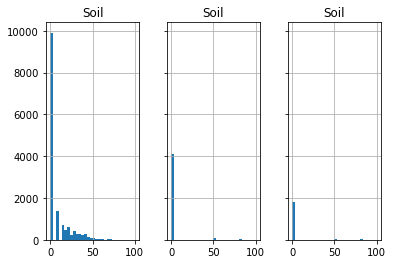

In [495]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row')

num = 1

df_norm_tables.hist(column = labels_list[num], bins = 30, ax=ax[0], figsize=(10, 10))
df_norm_alignment_sheets.hist(column = labels_list[num], bins = 30, ax=ax[1], figsize=(10, 10))
df_norm_figures.hist(column = labels_list[num], bins = 30, ax=ax[2], figsize=(10, 10))


In [496]:
df_norm.head()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
0,Table 13.2-1 Cost Comparisons of the Three Alternatives Route,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",31,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-1-cost-comparisons-of-the-three-alterna_pt-1_pg-31_doc-num-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Table 13.2-2 Linear Corridors Followed by Each Alternative,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",32,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-2-2-linear-corridors-followed-by-each-alt_pt-1_pg-32_doc-num-A0H8C0.zip,True,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,19,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1
2,Table 13.3-1 Project Inclusion List Baseline Scenario Land Use,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gas,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/268706,Large Projects (over 40 km),"Alberta, British Columbia",GH-1-2003,AXYS Environmental Consulting Ltd.,Operating,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/268876,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/293763,"Section 13.1: Introduction, Section 13.1: Project Description, Section 13.3: Assessment Methods,...",1.0,"Land, Air, Vegetation",41,107.0,1.41,Yes,/projects/kwn.zip,/tables/kwn_table-13-3-1-project-inclusion-list-baseline-scena_pt-1_pg-41_doc-num-A0H8C0.zip,True,16,0,0,14,0,0,16,0,0,0,0,0,0,0,0,10,14,14,27,10,0,10,thumbnails/268706_41.jpg,268706,268706_41_t_1,2
3,Table 13.4-1 Key Impact Questions on Air Quality Assessment Approach Key Impact Question Assessm...,Table,Application to Construct and Operate Ekwan Pipeline,Ekwan,2003-03-17,EnCana E

In [497]:
df = df_norm.copy()

# Adding Alignment Sheet in Alignment Sheet rows with Figure in Title

In [498]:
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('Figure')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('FIGURE')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('figure')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']

df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('Table')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('TABLE')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.loc[(df['Content Type'] == 'Alignment Sheet') & (df['Title'].str.contains('table')), 'Title'] = '(Alignment Sheet) ' + df.loc[(df['Content Type'] == 'Alignment Sheet'), 'Title']
df.tail()

,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Project Download Path,Table Download Path,Good Quality,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights,Thumbnail Location,Data ID,ID Internal,ID
21420,(Alignment Sheet) Figure 10.3 Protective and Consultative Notations - Lundbreck Section,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,297,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,34,0,0,0,0,0,0,0,0,0,thumbnails/4003703_297.jpg,4003703,4003703_297_a_1,21420
21421,(Alignment Sheet) Figure 11.1 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,323,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_323.jpg,4003703,4003703_323_a_1,21421
21422,(Alignment Sheet) Figure 11.2 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,Applied,NaN,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3968941,NaN,"7.0 ASSESSMENT OF EFFECTS ON WILDLIFE AND WILDLIFE HABITAT, 8.0 ASSESSMENT OF EFFECTS ON AQUATIC...",NaN,NaN,324,612.0,13.74,Yes,NaN,NaN,NaN,0,0,0,0,0,0,39,0,0,0,0,0,0,0,0,39,0,0,0,0,0,53,thumbnails/4003703_324.jpg,4003703,4003703_324_a_1,21422
21423,(Alignment Sheet) Figure 14.1 Locations of Nearest Populated Land Base of Engaged Indigenous Gro...,Alignment Sheet,Application for the NGTL West Path Delivery 2023 Project,West Path Delivery 2023,2020-10-22,NOVA Gas Transmission Ltd.,Gas,C09063-11 NGTL WPD 2023_ESA_Part 2_Sections 7 to 18 - A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3974306,A7J7C9,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/4003703,Large Projects (over 40 km),Alberta,GH-002-2020,Stantec Consulting Ltd,

# Add VCs to French Index

In [499]:
df_fra = pd.read_csv(final_index_path + 'ESA_website_FRA.csv')

df_fra.head()

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
0,Tableau 13.2-1 Comparaison des coûts des trois tracés de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",31.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-1-comparaison-des-coûts-des-trois-tra_pt-1_pg-31_num-du-doc-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Tableau 13.2-2 Couloirs linéaires suivis par chaque solution de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",32.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-2-couloirs-linéaires-suivis-par-chaqu_pt-1_pg-32_num-du-doc-A0H8C0.zip,True,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,3,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1
2,Tableau 13.3-1 Liste d'inclusion de l'utilisation des terres du scénario de référence,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,h

In [500]:
# grabbing the VC columns to put match numbers in French file
df_fra.iloc[:, 29:51] = df.iloc[:, 29:51]
df_fra.iloc[:, 29:51].head()

,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0
1,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,19,0,0,0
2,16,0,0,14,0,0,16,0,0,0,0,0,0,0,0,10,14,14,27,10,0,10
3,0,0,0,0,0,0,0,0,0,34,0,0,18,0,0,20,0,0,19,16,0,19
4,0,0,0,0,0,0,0,0,0,21,11,0,0,0,0,0,0,0,19,16,0,0


In [503]:
df_fra.head()

,Titre,Type de contenu,Nom de la demande,Nom abrégé de la demande,Dépôt de la demande,Nom de la société,Produit de base,Nom de fichier,URL du dossier de l'ÉES,Numéro de document,URL de téléchargement PDF,Type de demande (Loi sur l'Office national de l'énergie),Emplacement du pipeline,Ordonnance d'audience,Nom du consultant,État d'avancement,Instruments réglementaires,URL de la demande,URL de la décision,Sections de l'EES,Index des sections de l'ÉES,Sujets des sections de l'ÉES,Numéro de page PDF,Nombre de pages PDF,Taille PDF,Aperçu PDF,Chemin d'accès pour télécharger le projet,Chemin d'accès pour télécharger le tableau,Bonne qualité,"Paysage, terrain et conditions météorologiques",Sol,Plantes,Eau,Poissons,Milieux humides,Faune,Espèces en péril,Émissions de gaz à effet de serre,Émissions atmosphériques,Bruit,Électricité et électromagnétisme,Lieux habités à proximité,"Sites et ressources archéologiques, paléontologiques, historiques ou importants sur le plan culturel",Activités à bord d’embarcation ou sur des voies navigables,"Utilisation des terres, de l’eau et du plein air par les Autochtones",Incidences sur le bien-être social et culturel,Incidence sur la santé humaine et le panorama,"Infrastructure et services sociaux, culturels et économiques",Compensations et répercussions économiques,Obligations en matière d’environnement,Droits ancestraux et issus de traités,Thumbnail Location,Data ID,ID Internal,ID
0,Tableau 13.2-1 Comparaison des coûts des trois tracés de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",31.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-1-comparaison-des-coûts-des-trois-tra_pt-1_pg-31_num-du-doc-A0H8C0.zip,True,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14,0,0,0,0,0,thumbnails/268706_31.jpg,268706,268706_31_t_1,0
1,Tableau 13.2-2 Couloirs linéaires suivis par chaque solution de rechange,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268876,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/293763,"Section 13.1 : Introduction, Section 13.1 : Description du projet, Section 13.3 : Méthodes d'éva...",1.0,"Terres, Air, Végétation",32.0,107.0,1.41,Oui,/projects/kwn.zip,/tables/kwn_tableau-13-2-2-couloirs-linéaires-suivis-par-chaqu_pt-1_pg-32_num-du-doc-A0H8C0.zip,True,10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,0,19,0,0,0,thumbnails/268706_32.jpg,268706,268706_32_t_1,1
2,Tableau 13.3-1 Liste d'inclusion de l'utilisation des terres du scénario de référence,Tableau,Demande visant la construction et l'exploitation du pipeline Ekwan,Ekwan,2003-03-17,EnCana Ekwan Pipeline Inc.,Gaz,A0H8C0 - 13.0 EIA - Section 13.1 to 13.6,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/268693,A0H8C0,https://apps.cer-rec.gc.ca/REGDOCS/Fichier/Téléchargement/268706,Projets de grande envergure (plus de 40 km),"Alberta, Colombie-Britannique",GH-1-2003,AXYS Environmental Consulting Ltd.,En exploitation,GC-108,https://apps.cer-rec.gc.ca/REGDOCS/Élément/Afficher/26887

# Update Alignment Sheet Titles for French Index

In [504]:
df_new_align = pd.read_csv(r"C:\Users\ThibJacq\Downloads\new_alignment_sheet_titles_for_translation_FR.csv")

ParserError: Error tokenizing data. C error: Expected 1 fields in line 39, saw 7


In [397]:
df_new_align.head(2)

,"Title,Titre,ID",Unnamed: 1
0,"Figure A-1: Baseline Disturbances in Regional Study Area � Sheet 1 of 12 ,Figure A-1�: Perturba...",NaN
1,"Figure A-2: Baseline Disturbances in Regional Study Area � Sheet 2 of 12,Figure A-2�: Perturbati...",NaN


# Update the Alignment Sheet French Titles

In [ ]:
df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('Figure')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']
df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('FIGURE')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']
df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('figure')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']

df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('Table')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']
df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('TABLE')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']
df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet') & (df_fra['Title'].str.contains('table')), 'Title'] = '(Alignment Sheet) ' + df_fra.loc[(df_fra['Content Type'] == 'Alignment Sheet'), 'Title']
df_fra.tail()

# Save Labeled Index File

In [ ]:
import time
current_time = time.strftime('%Y-%m-%d_%H-%M-%S')
print(current_time)

2021-09-07_12-29-08


In [ ]:
save_index_path_eng = str(Path().resolve().parents[1]) + '\\Output_Files\\ESA_index_files\\'
save_index_path_francais = str(Path().resolve().parents[1]) + '\\Output_Files\\ESA_index_files\\'

In [ ]:
df_f_as.to_csv(f'./mydata/esa_index_keyword_labeled_{current_time}.csv', encoding='utf-8')

In [ ]:
df = pd.read_csv('./mydata/esa_index_keyword_labeled_24aug2021.csv')

C:\Users\ThibJacq\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (12,23,28) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [ ]:
df.drop(columns=['Unnamed: 0'], inplace=True)

In [ ]:
df.head()

,Index,Title,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,Data ID,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,CSV Download URL,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Download folder name,Zipped Project Link,Missing CSV,CSV Filename,csvFileName,text,"Landscape, terrain, and weather",Soil,Plants,Water,Fish,Wetlands,Wildlife,Species at Risk,Greenhouse gas emissions,Air emissions,Noise,Electricity and electromagnetism,Proximity to people,"Archaeological, paleontological, historical, and culturally significant sites and resources",Human access to boats and waterways,"Indigenous land, water, and air use",Impact to social and cultural well-being,Impact to human health and viewscapes,"Social, cultural, economic infrastructure and services",Economic Offsets and Impact,Environmental Obligations,Treaty and Indigenous Rights
0,9134,TABLE 3 SUMMARY OF AQUATICS FIELD WORK AND ABORIGINAL FIELD STUDY PARTICIPATION FOR THE PROJECT,Table,Application for North Montney Project,North Montney,11/8/2013,NOVA Gas Transmission Ltd.,Gas,B2-16 ESA_Appendix_G_Part1of4 (A3Q6H2),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/1060040,A3Q6H2,1059614.0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/1059614,Large Projects (over 40 km),"British Columbia, All",GH-001-2014,"Stantec Consulting Ltd., TERA Environmental Consultants",Operating,GC-125,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/1060220,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3890551,Appendix G: TERA Aquatics Summary Report,15.0,"Water, All",http://www.cer-rec.gc.ca/esa-ees/nrthmntn/nrthmntn_table-3-summary-of-aquatics-field-work-and-ab...,14.0,48.0,5.87,No,nrthmntn,http://www.cer-rec.gc.ca/esa-ees/nrthmntn.zip,False,nrthmntn_table-3-summary-of-aquatics-field-work-and-aborigi_pt-1_pg-14_doc-num-A3Q6H2.csv,1059614_14_lattice-v_1.csv,TABLE 3 SUMMARY OF AQUATICS FIELD WORK AND ABORIGINAL FIELD STUDY PARTICIPATION FOR THE PROJECT ...,0,0,0,17,15,0,1,0,0,0,0,0,0,0,0,14,1,0,0,0,0,26
1,9135,TABLE 4 SUMMARY OF WATERCOURSE CROSSINGS ALONG THE NORTH MONTNEY MAINLINE (AITKEN CREEK SECTION),Table,Application for North Montney Project,North Montney,11/8/2013,NOVA Gas Transmission Ltd.,Gas,B2-16 ESA_Appendix_G_Part1of4 (A3Q6H2),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/1060040,A3Q6H2,1059614.0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/1059614,Large Projects (over 40 km),"British Columbia, All",GH-001-2014,"Stantec Consulting Ltd., TERA Environmental Consultants",Operating,GC-125,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/1060220,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3890551,Appendix G: TERA Aquatics Summary Report,15.0,"Water, All",http://www.cer-rec.gc.ca/esa-ees/nrthmntn/nrthmntn_table-4-summary-of-watercourse-crossings-alon...,17.0,48.0,5.87,No,nrthmntn,http://www.cer-rec.gc.ca/esa-ees/nrthmntn.zip,False,nrthmntn_table-4-summary-of-watercourse-crossings-along-the_pt-1_pg-17_doc-num-A3Q6H2.csv,1059614_17_lattice-v_1.csv,TABLE 4 SUMMARY OF WATERCOURSE CROSSINGS ALONG THE NORTH MONTNEY MAINLINE AITKEN CREEK SECTION F...,3,2,6,47,89,3,13,16,1,0,0,0,0,0,25,22,2,0,1,20,2,22
2,9136,TABLE 4 SUMMARY OF WATERCOURSE CROSSINGS ALONG THE NORTH MONTNEY MAINLINE (AITKEN CREEK SECTION),Table,Application for North Montney Project,North Montney,11/8/2013,NOVA Gas Transmission Ltd.,Gas,B2-16 ESA_Appendix_G_Part1of4 (A3Q6H2),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/1060040,A3Q6H2,1059614.0,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/1059614,Large Projects (over 40 km),"British Columbia, All",GH-001-2014,"Stantec Consulting Ltd., TERA Environmental Consultants",Operating,GC-125,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/1060220,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3890551,Appendix G: TERA Aqua

In [ ]:
# with open("esa_index_ENG_labeled.pkl", "rb") as f:
#     df = pickle.load(f)

In [ ]:
from sklearn.model_selection import train_test_split
train_df, validation_df = train_test_split(df, test_size=300, random_state=42)
validation_df_labels = validation_df.iloc[:, 33:]
validation_df_labels.head(2)

,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
8889,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,10,1,2,0,4,2,1,2,1,0,12,4,0,4
27753,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,0,0,0,2,0,1,0,2,0,1,0,10,4,1,1


In [ ]:
validation_df_labels['Comments'] = 'N/A'

In [ ]:
train_df.to_csv("./data/esa_keyword_labeled_train_df_3aug2021.csv", index=False)
validation_df.to_csv("./data/esa_keyword_labeled_validation_3aug2021df.csv", index=False)
validation_df_labels.to_csv("./data/esa_keyword_labeled_validation_df_labels_3aug2021.csv", index=False)

In [ ]:
ground_truth_val_df = pd.read_excel('./data/esa_keyword_labeled_validation_df_labels.xlsx')

In [ ]:
ground_truth_val_df.head()

,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
0,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,0,2,2,0,4,2,1,2,1,0,11,9,0,4
1,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,13,0,0,0,0,1,0,6,0,1,0,6,4,0,1
2,TABLE D4 HOPE TO BURNABY OBSERVED PLANT SPECIES BY TYPE AND COMMON NAME Common Name Scientific N...,0,0,78,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TABLE 32 CONSULTATION ACTIVITIES WITH PROVINCIAL AGENCIES Stakeholder Group Agency Name Name and...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,Table 5218 Major Proposed Approved and Recently Completed Projects in the SocioEconomic Study Ar...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0


In [ ]:
validation_df.reset_index(inplace=True)

In [ ]:
validation_df.iloc[:, 34:].head()

,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
0,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,10,1,2,0,4,2,1,2,1,0,12,4,0,4
1,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,0,0,0,2,0,1,0,2,0,1,0,10,4,1,1
2,TABLE D4 HOPE TO BURNABY OBSERVED PLANT SPECIES BY TYPE AND COMMON NAME Common Name Scientific N...,0,0,78,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,TABLE 32 CONSULTATION ACTIVITIES WITH PROVINCIAL AGENCIES Stakeholder Group Agency Name Name and...,1,1,1,4,0,0,0,0,0,0,0,0,4,0,0,0,0,0,12,4,1,2
4,Table 5218 Major Proposed Approved and Recently Completed Projects in the SocioEconomic Study Ar...,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,4,0,0,0


In [ ]:
validation_df.iloc[:, 34:] = ground_truth_val_df

C:\Users\ThibJacq\Anaconda3\lib\site-packages\pandas\core\indexing.py:1754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [ ]:
ground_truth_val_df.head(2)

,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
0,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,0,2,2,0,4,2,1,2,1,0,11,9,0,4
1,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,13,0,0,0,0,1,0,6,0,1,0,6,4,0,1


In [ ]:
validation_df.head(2)

,index,Index,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,Data ID,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,CSV Download URL,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Download folder name,Zipped Project Link,Missing CSV,CSV Filename,csvFileName,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
0,8889,18023,Table,Application for the 2017 NGTL System Expansion,2017 NGTL System Expansion,3/31/2015,NOVA Gas Transmission Ltd.,Gas,B2-15_ESA_Main_Sec_8_Part1of2 - A4K2S0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/2748481,A4K2S0,2758825,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/2758825,Large Projects (over 40 km),"Alberta, All",GH-002-2015,TERA a CHTM HILL Company,Operating,GC-126,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/2758964,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/2985011,Section 8: Cumulative Effects Assessment,15.0,"Other, All",http://www.cer-rec.gc.ca/esa-ees/2017ngtl/2017ngtl_table-8a-2-reasonably-forseeable-developments...,359,472.0,6.50,Yes,2017ngtl,http://www.cer-rec.gc.ca/esa-ees/2017ngtl.zip,False,2017ngtl_table-8a-2-reasonably-forseeable-developments-iden_pt-10_pg-359_doc-num-A4K2S0.csv,2758825_359_lattice-v_1.csv,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,0,2,2,0,4,2,1,2,1,0,11,9,0,4
1,27753,36887,Table,Application for the Northwest Mainline Expansion,Northwest Mainline,4/29/2011,NOVA Gas Transmission Ltd.,Gas,B3-38 - 7212_App8_EPP - A1Y9J1,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/684358,A1Y9J1,684515,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/684515,Large Projects (over 40 km),"Alberta, British Columbia, All",GH-2-2011,TERA Environmental Consultants,Operating,GC-119,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/685859,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/793577,Appendix 8: Environmental Protection Plan,23.0,"Environment Protection Plan, All",http://www.cer-rec.gc.ca/esa-ees/nrthwstmnln/nrthwstmnln_table-1-resource-specific-mitigation-ta...,22,194.0,4.43,Yes,nrthwstmnln,http://www.cer-rec.gc.ca/esa-ees/nrthwstmnln.zip,False,nrthwstmnln_table-1-resource-specific-mitigation-table_pt-3_pg-22_doc-num-A1Y9J1.csv,684515_22_lattice-v_1.csv,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,13,0,0,0,0,1,0,6,0,1,0,6,4,0,1


In [ ]:
validation_df.set_index(list(validation_df)[0], inplace=True)

AttributeError: can't delete attribute

In [ ]:
validation_df.index.name = None

In [ ]:
validation_df.head()

,Index,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,Data ID,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,CSV Download URL,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Download folder name,Zipped Project Link,Missing CSV,CSV Filename,csvFileName,text,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
8889,18023,Table,Application for the 2017 NGTL System Expansion,2017 NGTL System Expansion,3/31/2015,NOVA Gas Transmission Ltd.,Gas,B2-15_ESA_Main_Sec_8_Part1of2 - A4K2S0,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/2748481,A4K2S0,2758825,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/2758825,Large Projects (over 40 km),"Alberta, All",GH-002-2015,TERA a CHTM HILL Company,Operating,GC-126,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/2758964,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/2985011,Section 8: Cumulative Effects Assessment,15.0,"Other, All",http://www.cer-rec.gc.ca/esa-ees/2017ngtl/2017ngtl_table-8a-2-reasonably-forseeable-developments...,359,472.0,6.50,Yes,2017ngtl,http://www.cer-rec.gc.ca/esa-ees/2017ngtl.zip,False,2017ngtl_table-8a-2-reasonably-forseeable-developments-iden_pt-10_pg-359_doc-num-A4K2S0.csv,2758825_359_lattice-v_1.csv,TABLE 8A2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BEA...,2,1,1,3,3,1,2,0,0,2,2,0,4,2,1,2,1,0,11,9,0,4
27753,36887,Table,Application for the Northwest Mainline Expansion,Northwest Mainline,4/29/2011,NOVA Gas Transmission Ltd.,Gas,B3-38 - 7212_App8_EPP - A1Y9J1,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/684358,A1Y9J1,684515,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/684515,Large Projects (over 40 km),"Alberta, British Columbia, All",GH-2-2011,TERA Environmental Consultants,Operating,GC-119,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/685859,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/793577,Appendix 8: Environmental Protection Plan,23.0,"Environment Protection Plan, All",http://www.cer-rec.gc.ca/esa-ees/nrthwstmnln/nrthwstmnln_table-1-resource-specific-mitigation-ta...,22,194.0,4.43,Yes,nrthwstmnln,http://www.cer-rec.gc.ca/esa-ees/nrthwstmnln.zip,False,nrthwstmnln_table-1-resource-specific-mitigation-table_pt-3_pg-22_doc-num-A1Y9J1.csv,684515_22_lattice-v_1.csv,TABLE 1 RESOURCESPECIFIC MITIGATION TABLE Location Issues Timing Windows and or Regulatory Guide...,0,3,39,0,0,0,0,13,0,0,0,0,1,0,6,0,1,0,6,4,0,1
4165,13299,Table,Application for Trans Mountain Expansion Project,Trans Mountain Expansion,12/16/2013,Trans Mountain Pipeline ULC,Oil,B9-23 - V5C_TR_5C9_17of20_VEGETATION - A3S2L6,https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/2385502,A3S2L6,2393491,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/2393491,Large Projects (over 40 km),"Alberta, British Columbia, All",OH-001-2014,"BGC Engineering Inc., Waterline Resources Inc., TERA Environmental Consultants, Mentiga Pedology...",Approved,OC-064. OC-065,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/2392873,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3751789,Vegetation Technical Report,161.0,"Vegetation, Technology, All",http://www.cer-rec.gc.ca/esa-ees/tmx/tmx_table-d4-hope-to-burnaby-observed-plant-species--b_pt-5...,176,180.0,2.

In [ ]:
final_df = pd.concat([train_df, validation_df], axis=0)

In [ ]:
final_df.sort_index(inplace=True)

In [ ]:
final_df.to_csv('./data/esa_index_vcs_ENG_with_table_contents_3aug2021.csv')

In [ ]:
final_df.drop(columns=['text'], inplace=True)

In [ ]:
final_df.head(2)

,Index,Content Type,Application Name,Application Short Name,Application Filing Date,Company Name,Commodity,File Name,ESA Folder URL,Document Number,Data ID,PDF Download URL,Application Type (NEB Act),Pipeline Location,Hearing order,Consultant Name,Pipeline Status,Regulatory Instrument(s),Application URL,Decision URL,ESA Section(s),ESA Section(s) Index,ESA Section(s) Topics,CSV Download URL,PDF Page Number,PDF Page Count,PDF Size,PDF Outline,Download folder name,Zipped Project Link,Missing CSV,CSV Filename,csvFileName,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations,Rights of Indigenous Peoples
0,9134,Table,Application for North Montney Project,North Montney,11/8/2013,NOVA Gas Transmission Ltd.,Gas,B2-16 ESA_Appendix_G_Part1of4 (A3Q6H2),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/1060040,A3Q6H2,1059614,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/1059614,Large Projects (over 40 km),"British Columbia, All",GH-001-2014,"Stantec Consulting Ltd., TERA Environmental Consultants",Operating,GC-125,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/1060220,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3890551,Appendix G: TERA Aquatics Summary Report,15.0,"Water, All",http://www.cer-rec.gc.ca/esa-ees/nrthmntn/nrthmntn_table-3-summary-of-aquatics-field-work-and-ab...,14,48.0,5.87,No,nrthmntn,http://www.cer-rec.gc.ca/esa-ees/nrthmntn.zip,False,nrthmntn_table-3-summary-of-aquatics-field-work-and-aborigi_pt-1_pg-14_doc-num-A3Q6H2.csv,1059614_14_lattice-v_1.csv,0,0,0,17,15,0,1,0,0,0,0,0,0,0,0,14,1,0,0,0,0,26
1,9135,Table,Application for North Montney Project,North Montney,11/8/2013,NOVA Gas Transmission Ltd.,Gas,B2-16 ESA_Appendix_G_Part1of4 (A3Q6H2),https://apps.cer-rec.gc.ca/REGDOCS/Item/LoadResult/1060040,A3Q6H2,1059614,https://apps.cer-rec.gc.ca/REGDOCS/File/Download/1059614,Large Projects (over 40 km),"British Columbia, All",GH-001-2014,"Stantec Consulting Ltd., TERA Environmental Consultants",Operating,GC-125,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/1060220,https://apps.cer-rec.gc.ca/REGDOCS/Item/View/3890551,Appendix G: TERA Aquatics Summary Report,15.0,"Water, All",http://www.cer-rec.gc.ca/esa-ees/nrthmntn/nrthmntn_table-4-summary-of-watercourse-crossings-alon...,17,48.0,5.87,No,nrthmntn,http://www.cer-rec.gc.ca/esa-ees/nrthmntn.zip,False,nrthmntn_table-4-summary-of-watercourse-crossings-along-the_pt-1_pg-17_doc-num-A3Q6H2.csv,1059614_17_lattice-v_1.csv,3,2,6,47,89,3,13,16,1,0,0,0,0,0,25,22,2,0,1,20,2,22


In [ ]:
final_df.to_csv('./data/esa_index_vcs_ENG_3aug2021.csv')

In [ ]:
final_df.iloc[:, 33:].sum().sort_values(ascending=False)

Infrastructure and services                                         158639
Water quality and quantity                                          146050
Employment and economy                                              102744
Fish and fish habitat                                                97665
Rights of Indigenous Peoples                                         93681
Vegetation                                                           92857
Soil and soil productivity                                           83658
Wildlife and wildlife habitat                                        82439
Navigation and navigation safety                                     79562
Traditional land and resource use                                    61676
Human occupancy and resource use                                     60808
Social and cultural well-being                                       48013
Species at Risk or Species of Special Status and related habitat     45080
Wetlands                 

In [ ]:
import numpy as np
final_df.iloc[:, 33:].select_dtypes(np.number).gt(0).sum(axis=0).sort_values(ascending=False)

Infrastructure and services                                         17571
Water quality and quantity                                          16873
Employment and economy                                              14674
Rights of Indigenous Peoples                                        12645
Fish and fish habitat                                               12512
Vegetation                                                          12419
Wildlife and wildlife habitat                                       12025
Human occupancy and resource use                                    11957
Soil and soil productivity                                          10961
Social and cultural well-being                                       9856
Traditional land and resource use                                    9294
Navigation and navigation safety                                     8782
Species at Risk or Species of Special Status and related habitat     8071
Environmental Obligations             

In [ ]:
labeled_df = pd.read_csv('./data/project-1-at-2021-07-09-00-52-898dbd22.csv')

In [ ]:
labeled_df

,Unnamed: 0,text,label,id,sentiment,annotator,annotation_id
0,8889,TABLE 8A.2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN THE SPATIAL BOUNDARIES OF THE BE...,-1,1,"{""choices"": [""Physical and meteorological environment"", ""Soil and soil productivity"", ""Vegetatio...",jacques.thibodeau@cer-rec.gc.ca,1


In [ ]:
for i in range(len(labeled_df)):
    chosen_labels = ast.literal_eval(labeled_df.sentiment[i])["choices"]
    for label in labels_list:
        if label in chosen_labels:
            df[f'{label}'][i] = 1

<ipython-input-91-cb7868f289e9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[f'{label}'][i] = 1


In [ ]:
df.iloc[:,36:58]

,Physical and meteorological environment,Soil and soil productivity,Vegetation,Water quality and quantity,Fish and fish habitat,Wetlands,Wildlife and wildlife habitat,Species at Risk or Species of Special Status and related habitat,Greenhouse gas (GHG) emissions and climate change,GHG Emissions and Climate Change – Assessment of Upstream GHG Emissions,Air emissions,Acoustic environment,Electromagnetism and Corona Discharge,Human occupancy and resource use,Heritage resources,Navigation and navigation safety,Traditional land and resource use,Social and cultural well-being,Human health and aesthetics,Infrastructure and services,Employment and economy,Environmental Obligations
0,1,1,1,1,1,1,1,0,0,0,0,1,0,0,0,1,1,1,0,0,0,0
1,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0,1,1,1
2,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1
3,1,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,1,1
4,1,1,0,1,1,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28886,0,1,1,1,1,0,0,0,0,0,0,0,0,1,0,1,1,0,0,1,1,1
28887,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
28888,0,0,0,0,0,1,1,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1
28889,0,0,0,0,0,1,1,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1


In [ ]:
for i in range(len(labeled_df)):
    

In [ ]:
str('"choices" ' + str(df.iloc[0, 36:][df.iloc[0, 36:] == 1].index.values.tolist()) + '}').replace('\'', '')

'"choices" [Physical and meteorological environment, Soil and soil productivity, Vegetation, Water quality and quantity, Fish and fish habitat, Wetlands, Wildlife and wildlife habitat, Acoustic environment, Navigation and navigation safety, Traditional land and resource use, Social and cultural well-being, Rights of Indigenous Peoples]}'

In [ ]:
type({"choices": ["Physical and meteorological environment", "Soil and oil productivity", "Vegetation", "Water quality and quantity", "Fish and fish habitat", "Wetlands", "Wildlife and wildlife habitat", "Acoustic environment"]})

dict

In [ ]:
myDict = {}
myDict["choices"] = df.iloc[0, 36:][df.iloc[0, 36:] == 1].index.values.tolist()

In [ ]:
myDict

{'choices': ['Physical and meteorological environment',
  'Soil and soil productivity',
  'Vegetation',
  'Water quality and quantity',
  'Fish and fish habitat',
  'Wetlands',
  'Wildlife and wildlife habitat',
  'Acoustic environment',
  'Navigation and navigation safety',
  'Traditional land and resource use',
  'Social and cultural well-being',
  'Rights of Indigenous Peoples']}

In [ ]:
import json

json.dumps(myDict)

'{"choices": ["Physical and meteorological environment", "Soil and soil productivity", "Vegetation", "Water quality and quantity", "Fish and fish habitat", "Wetlands", "Wildlife and wildlife habitat", "Acoustic environment", "Navigation and navigation safety", "Traditional land and resource use", "Social and cultural well-being", "Rights of Indigenous Peoples"]}'

In [ ]:
import json

with open('./mydata/project-1-at-2021-07-17-04-15-91c3a72e.json', 'r') as f:
    diction = json.load(f)


In [ ]:
pd.DataFrame(diction[13:16])

,id,annotations,predictions,file_upload,data,meta,created_at,updated_at,project
0,5,"[{'id': 5, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': '...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 9544, 'text': 'Table 5.21-8: Major Proposed, Approved, and Recently Completed Pro...",{},2021-06-08T21:27:06.468686Z,2021-06-08T21:27:06.468698Z,1
1,4,"[{'id': 4, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': '...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 22455, 'text': 'TABLE 3.2 CONSULTATION ACTIVITIES WITH PROVINCIAL AGENCIES Stake...",{},2021-06-08T21:27:06.468603Z,2021-06-08T21:27:06.468611Z,1
2,3,"[{'id': 3, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': '...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 4165, 'text': 'TABLE D4 HOPE TO BURNABY OBSERVED PLANT SPECIES ï¿½ BY TYPE AND CO...",{},2021-06-08T21:27:06.468566Z,2021-06-08T21:27:06.468574Z,1


In [ ]:
import pandas as pd

testing_df = pd.DataFrame(diction)
# testing_df.annotations[0]
with open('./mydata/project-1-at-2021-07-17-04-15-91c3a72e.json', 'r') as f:
    testing_df = pd.read_json(f)

testing_df

,id,annotations,predictions,file_upload,data,meta,created_at,updated_at,project
0,1,"[{'id': 1, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': '...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 8889, 'text': 'TABLE 8A.2 REASONABLY FORSEEABLE DEVELOPMENTS IDENTIFIED WITHIN TH...",{},2021-06-08 21:27:06.468460+00:00,2021-07-10 21:55:17.524780+00:00,1
1,17,"[{'id': 17, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 15949, 'text': 'Table B-1 Progress Farrell Creek West Gas Plant B-088-I/094-B-01 ...",{},2021-06-08 21:27:06.469107+00:00,2021-06-08 21:27:06.469114+00:00,1
2,16,"[{'id': 16, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 15105, 'text': 'Table 8-19 Exposure Point Concentrations in Marine Organisms Expo...",{},2021-06-08 21:27:06.469073+00:00,2021-06-08 21:27:06.469080+00:00,1
3,15,"[{'id': 15, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 10843, 'text': 'Table 6-3 Recommended Mitigation Measures for Fish and Fish Habit...",{},2021-06-08 21:27:06.469041+00:00,2021-06-08 21:27:06.469048+00:00,1
4,14,"[{'id': 14, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 10810, 'text': 'Table 2-6 Residual Effects on Land Resource Use Project Phase Mi...",{},2021-06-08 21:27:06.469005+00:00,2021-06-08 21:27:06.469012+00:00,1
5,13,"[{'id': 13, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 19786, 'text': 'Table 4-11: Effects and Mitigation Measures Raised at the Round 2...",{},2021-06-08 21:27:06.468972+00:00,2021-06-08 21:27:06.468979+00:00,1
6,12,"[{'id': 12, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 24525, 'text': 'Table 11-13 Site Specific Wildlife Mitigation Measures Recommende...",{},2021-06-08 21:27:06.468936+00:00,2021-06-08 21:27:06.468943+00:00,1
7,11,"[{'id': 11, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 351, 'text': 'Table 21-23 Cumulative Effects Initial Screening ï¿½ Social and Cul...",{},2021-06-08 21:27:06.468904+00:00,2021-06-08 21:27:06.468911+00:00,1
8,10,"[{'id': 10, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': ...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 15394, 'text': 'Table 2 TLRU Information and Mitigation ï¿½ Les Atikamekw de Mana...",{},2021-06-08 21:27:06.468870+00:00,2021-06-08 21:27:06.468877+00:00,1
9,9,"[{'id': 9, 'completed_by': {'id': 1, 'email': 'jacques.thibodeau@cer-rec.gc.ca', 'first_name': '...",[],esa_index_for_labeling.csv,"{'Unnamed: 0': 25965, 'text': 'Table 6-7 Agricultural Soils Ratings ï¿½ Infrastructure Physiogr...",{},2021-06-08 21:27:06.468830+00:00,2021-06-08 21:27:06.468837+00:00,1
